# Feature Engine - Unit 05 - Handle Variable Discretization

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Handle Variable Discretization using Equal Frequency discretizer, Equal Width discretizer or Arbitrary discretizer



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

And load our typical packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Handle Variable Discretization

This technique consists of transforming continuous numerical variables into discrete variables. The discrete variables will contain intervals related to the numerical distribution. The interval will be decided based on the frequency or width. We will study:
* EqualFrequencyDiscretiser
* EqualWidthDiscretiser
* ArbitraryDiscretiser



<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> When should I consider using them? We can consider these use cases:
* Eventually, your feature has an abnormal or weird numerical distribution and by discretizing this variable, the categorical distribution is better understood by the model
* You have a continuous target variable, and you are not successful in fitting a model to the dataset. Then, you can discretize the target variable and convert the ML task to classification since your target variable is now categorical. The expectation is that we will create more conditions to find a model that fits the data.


#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Equal Frequency

It divides continuous numerical variables into contiguous equal frequency intervals, that is, intervals that contain approximately the same proportion of observations. The function documentation is found [here](https://feature-engine.readthedocs.io/en/1.1.x/discretisation/EqualFrequencyDiscretiser.html)
* The arguments are `variables` to apply the method, if you don't parse anything, it will select all numerical variables. And `q` (for quantiles), which is the desired number of equal frequency intervals (or quantiles).


from feature_engine.discretisation import EqualFrequencyDiscretiser

We will use the target variable from the Boston dataset

from sklearn import datasets
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.target, columns=['target'])
df.head()

We assess the distribution with sns.histplot()

sns.histplot(data=df, x='target', kde=True)
plt.show()

We create a pipeline with `EqualFrequencyDiscretiser()`, on the target variable and look for 5 bins. We then `.fit_transform()` the data
* In the workplace, you will consider criteria to select a number for ``q``. Eventually, it will make sense to have 3 or 6. At the same time, you can run multiple simulations and assess the results for numerous ``q``


pipeline = Pipeline([
      ('efd', EqualFrequencyDiscretiser(q=5, variables=['target'] ))
])

df_transformed = pipeline.fit_transform(df)

We assess the efd step and check what were the bins the transformer calculated with `.binner_dict_`

pipeline['efd'].binner_dict_

Finally, we plot the new target distribution. As we may expect, all intervals have the same frequency
* Note in the plot, the bar where the target is zero, it correspond to the numerical interval of -inf to 15.3. You can extend this for the remaining bars


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The upside of using this technique, considering you are using the target variable, is that your target variable for the classification task will be already balanced, which means the labels have similar frequencies.

sns.countplot(data=df_transformed, x='target')
plt.show()

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Equal Width

This technique divides continuous numerical variables into intervals of the same width. Note that the count of observations per interval may vary. The function documentation is found [here](https://feature-engine.readthedocs.io/en/1.1.x/discretisation/EqualWidthDiscretiser.html).
* The arguments are `variables` to apply the method to, if you don't parse anything, it will select all numerical variables. And `bins` which is the number of equal-width intervals/bins you want.

from feature_engine.discretisation import EqualWidthDiscretiser

We will use the target variable from the Boston dataset

from sklearn import datasets
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.target, columns=['target'])
df.head()

We assess its distribution

sns.histplot(data=df, x='target', kde=True)
plt.show()

We create a pipeline with `EqualWidthDiscretiser()`, on the target variable and look for 6 bins. We then `.fit_transform()` the data
* In the workplace, you will consider criteria to select a number of `bins`. Eventually, it will make sense to have 3, or 6. At the same time, you can run multiple simulations and assess the results for numerous `bins`


pipeline = Pipeline([
      ('ewd', EqualWidthDiscretiser(bins=6, variables=['target']) )
])

df_transformed = pipeline.fit_transform(df)

We assess the ewd step and check what were the bins the transformer calculated with `.binner_dict_`

pipeline['ewd'].binner_dict_

Finally, we plot the new target distribution. As we may expect, all intervals have the same frequency
* Note in the plot, the bar where the target is zero, it correspond to the numerical interval of -inf to 12.5.  You can extend this for the remaining bars


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The downside of using this technique, considering you are using the target variable, is that your target variable for the classification task will likely not be balanced.

sns.countplot(data=df_transformed, x='target')
plt.show()

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Arbitrary Discretiser

It divides continuous range intervals which limits are determined by the user. The documentation is found [here](https://feature-engine.readthedocs.io/en/1.1.x/discretisation/ArbitraryDiscretiser.html). The used argument is:
* ``binning_dict`` is a dictionary that tells which variable you want to apply the method and the intervals.

* You may use this technique when the company is comfortable with how to map the numerical values to ranges. For example, imagine if the variable is Revenue from a given purchase. The business is comfortable to assume that Revenue smaller than 100 is small, between 100 and 1000 is medium and greater than 1000 is big. You can also conduct separate analyses with other custom ranges to question current assumptions and/or look for other criteria to discretize the data

from feature_engine.discretisation import ArbitraryDiscretiser

We will use the target variable from the Boston dataset

from sklearn import datasets
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.target, columns=['target'])
df.head()

We assess its distribution

sns.histplot(data=df, x='target', kde=True)
plt.show()

We create a pipeline with `ArbitraryDiscretiser()`, on the target variable and look for 6 bins. We then `.fit_transform()` the data
* In the workplace, you will consider criteria to select a number of `bins`. Eventually, it will make sense to have 3, or 6. At the same time, you can run multiple simulations and assess the results for numerous `bins`


import numpy as np # we import NumPy to set -inf and +inf
pipeline = Pipeline([
      ( 'arbd', ArbitraryDiscretiser(binning_dict={'target':[-np.inf,10,20,40,np.inf]}) )
])

df_transformed = pipeline.fit_transform(df)

We assess the arbd step and check the bins we created with `.binner_dict_`

pipeline['arbd'].binner_dict_

Finally, we plot the new target distribution. As we may expect, all intervals have the same frequency
* Note in the plot, the bar where the target is zero, corresponds to the numerical interval of -inf to 10.  You can extend this for the remaining bars


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The upside of this technique is that we set the intervals we are comfortable with. The downside is that the categorical distribution may be imbalanced.

sns.countplot(data=df_transformed, x='target')
plt.show()



In [38]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser, ArbitraryDiscretiser

# Setting style for seaborn
sns.set_style('whitegrid')

# Load the Boston dataset
boston_data = fetch_openml(data_id=531 , as_frame=True)
df = boston_data.frame

df = pd.DataFrame(boston_data, columns=['target'])
df.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


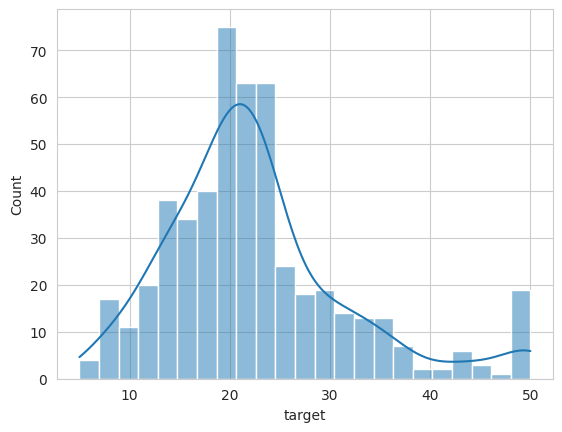

In [39]:
# Load the target variable from the Boston dataset
# from sklearn import datasets
# boston_data = datasets.load_boston()

# df = pd.DataFrame(boston_data.target, columns=['target'])

# Load the Boston dataset
# boston_data = fetch_openml(name='boston', version=1, as_frame=True)
# df = boston_data.frame
# df = pd.DataFrame(boston_data.target, columns=['target'])

# Plotting the distribution of the target variable
sns.histplot(data=df, x='target', kde=True)
plt.show()

# Creating a pipeline with EqualFrequencyDiscretiser for the target variable and 5 bins
pipeline_efd = Pipeline([
    ('efd', EqualFrequencyDiscretiser(q=5, variables=['target']))
])

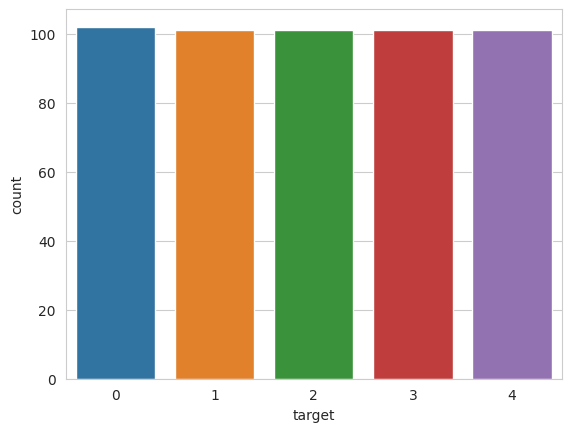

In [40]:
# Fitting and transforming the pipeline
df_efd = pipeline_efd.fit_transform(df)

# Checking the bins calculated by EqualFrequencyDiscretiser
pipeline_efd['efd'].binner_dict_

# Plotting the distribution of the transformed target variable
sns.countplot(data=df_efd, x='target')
plt.show()

# Creating a pipeline with EqualWidthDiscretiser for the target variable and 6 bins
pipeline_ewd = Pipeline([
    ('ewd', EqualWidthDiscretiser(bins=6, variables=['target']))
])

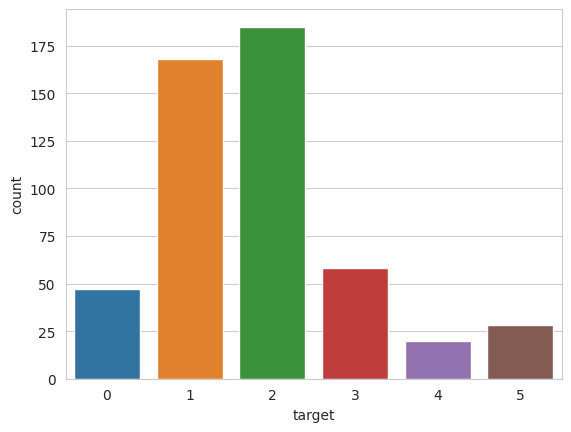

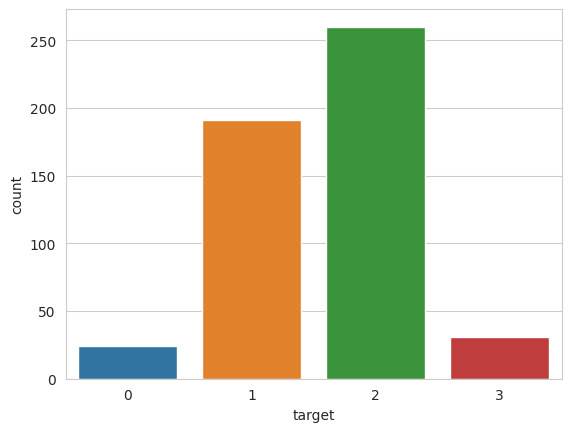

In [41]:
# Fitting and transforming the pipeline
df_ewd = pipeline_ewd.fit_transform(df)

# Checking the bins calculated by EqualWidthDiscretiser
pipeline_ewd['ewd'].binner_dict_

# Plotting the distribution of the transformed target variable
sns.countplot(data=df_ewd, x='target')
plt.show()

# Creating a pipeline with ArbitraryDiscretiser for the target variable with custom bins
pipeline_arbd = Pipeline([
    ('arbd', ArbitraryDiscretiser(binning_dict={'target':[-np.inf, 10, 20, 40, np.inf]}))
])

# Fitting and transforming the pipeline
df_arbd = pipeline_arbd.fit_transform(df)

# Checking the bins created by ArbitraryDiscretiser
pipeline_arbd['arbd'].binner_dict_

# Plotting the distribution of the transformed target variable
sns.countplot(data=df_arbd, x='target')
plt.show()